In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
import MLutils as myutils

In [2]:
ds = pd.read_csv('train.csv')
ds=ds[:6000]
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 15 columns):
ID                                      6000 non-null int64
age                                     6000 non-null float64
sex                                     6000 non-null int64
chest                                   6000 non-null float64
resting_blood_pressure                  6000 non-null float64
serum_cholestoral                       6000 non-null float64
fasting_blood_sugar                     6000 non-null int64
resting_electrocardiographic_results    6000 non-null int64
maximum_heart_rate_achieved             6000 non-null float64
exercise_induced_angina                 6000 non-null int64
oldpeak                                 6000 non-null float64
slope                                   6000 non-null int64
number_of_major_vessels                 6000 non-null int64
thal                                    6000 non-null int64
class                                   6

In [3]:
ds.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [4]:
f=[]        #list of categorical values to be one hot encoded
f.append("resting_electrocardiographic_results")
f.append("thal")

ds=pd.get_dummies(ds,columns=f)



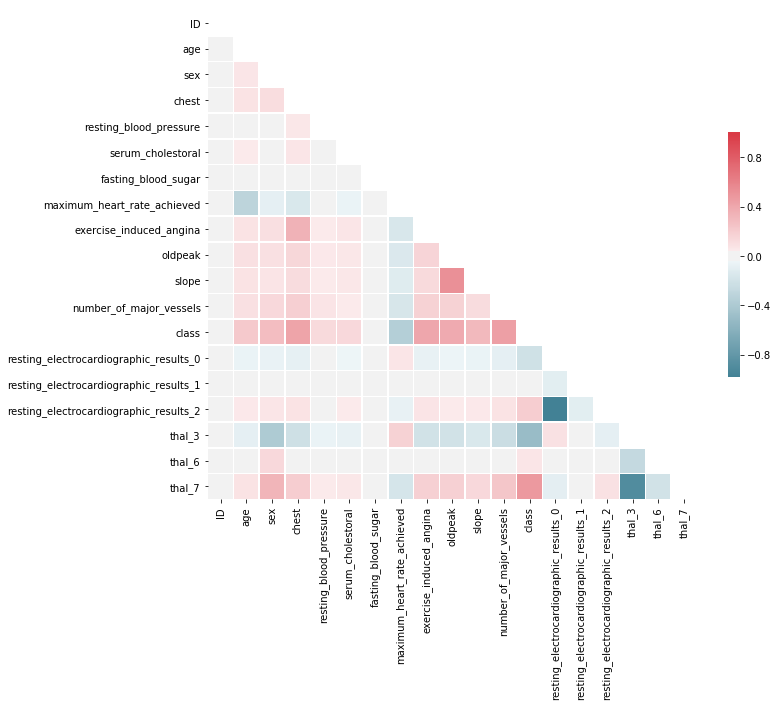

In [5]:
myutils.plot_corr(ds)

In [6]:
X=ds

#drop features 
X=X.drop(['ID','fasting_blood_sugar'],axis=1) 

X=X.dropna() 
y=X['class'] 
X=X.drop(['class'],axis=1)#drop the class to be predicted 

X[['age','chest','resting_blood_pressure','serum_cholestoral','oldpeak','maximum_heart_rate_achieved']]=myutils.standardscale(X[['age','chest','resting_blood_pressure','serum_cholestoral','oldpeak','maximum_heart_rate_achieved']])
X.shape

(6000, 16)

## drop features, make X,y
X=ds[ds.sex!=0]
X=X.drop(['ID','fasting_blood_sugar'],axis=1) #drop features
X=X.dropna()
y=X['class']
X=X.drop(['class'],axis=1)#drop the class to be predicted
X.shape

In [7]:
X.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,resting_electrocardiographic_results_0,resting_electrocardiographic_results_1,resting_electrocardiographic_results_2,thal_3,thal_6,thal_7
0,-0.564856,0,0.859533,1.763925,-1.308556,-0.047435,1,-0.100110,2,0,1,0,0,1,0,0
1,-0.079778,1,-1.523319,-0.071603,0.545327,0.154798,0,-0.824527,2,0,0,0,1,1,0,0
2,-0.522693,1,0.859533,0.867678,-0.488361,-2.025900,1,0.489795,2,2,0,0,1,0,0,1
3,0.508620,1,0.859533,-1.072474,-1.189258,0.381109,1,-0.929019,1,1,1,0,0,0,0,1
4,-0.362272,1,-1.298569,0.365301,-0.193221,1.001100,0,0.080597,1,1,1,0,0,1,0,0


In [8]:
xtrain,ytrain,xtest,ytest=myutils.split(X,y,0.8)
ytest2=myutils.converttolist(ytest)


In [9]:
myutils.callall(xtrain,ytrain,xtest,ytest2)

calling
['naiveBayes', 'decisionTree', 'adaBooster', 'randomForest', 'gradientBoost', 'logisticRegression', 'logisticRegressionCV', 'svm', 'linearsvm', 'Nusvc', 'mlp']
naive bayes
82.0
dec-tree
81.58333333333333
adabooster


/home/mayank/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


84.66666666666667
randome forest
83.41666666666667
Gradient boost started
86.25
Logistic Regression
85.66666666666667
Logistic Regression CV
85.58333333333333
Support-Vector-Machine
85.16666666666667
Linear Support-Vector-Machine
85.75
Nu Support-Vector-Machine
86.08333333333333
mlp
Iteration 1, loss = 0.59847310
Iteration 2, loss = 0.43815245
Iteration 3, loss = 0.35503358
Iteration 4, loss = 0.31243695
Iteration 5, loss = 0.29192527
Iteration 6, loss = 0.28178477
Iteration 7, loss = 0.27589267
Iteration 8, loss = 0.27203439
Iteration 9, loss = 0.26924504
Iteration 10, loss = 0.26711320
Iteration 11, loss = 0.26525122
Iteration 12, loss = 0.26347970
Iteration 13, loss = 0.26193020
Iteration 14, loss = 0.26038194
Iteration 15, loss = 0.25907885
Iteration 16, loss = 0.25764129
Iteration 17, loss = 0.25791712
Iteration 18, loss = 0.25533206
Iteration 19, loss = 0.25446620
Iteration 20, loss = 0.25361603
Iteration 21, loss = 0.25274019
Iteration 22, loss = 0.25171256
Iteration 23, loss = 

/home/mayank/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
